In [1]:
import pandas as pd
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('static/data/Arhar.csv')

In [3]:
df.head()

,Month,Year,Date,Rainfall,WPI
0,4,2012,4/2012,47.5,97.1
1,5,2012,5/2012,31.7,99.7
2,6,2012,6/2012,117.8,101.6
3,7,2012,7/2012,250.2,108.6
4,8,2012,8/2012,262.4,115.6


In [4]:
df=df.drop(['Month','Year','Rainfall'],axis=1)
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2012-04-01,97.1
1,2012-05-01,99.7
2,2012-06-01,101.6
3,2012-07-01,108.6
4,2012-08-01,115.6


In [39]:
df.tail()

,y
ds,
2018-08-01,110.8
2018-09-01,110.8
2018-10-01,109.4
2018-11-01,114.0
2018-12-01,123.9


In [38]:
df.set_index('ds',inplace=True)


KeyError: "None of ['ds'] are in the columns"

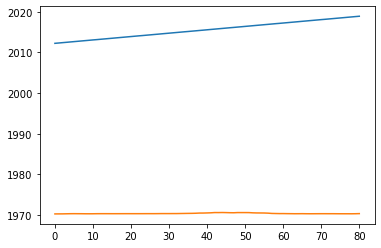

In [46]:
plt.plot(df)

In [47]:
from fbprophet import Prophet
model=Prophet()

In [48]:
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=400,include_history=True)

In [50]:
future_dates.tail()

,ds
476,2020-01-01
477,2020-01-02
478,2020-01-03
479,2020-01-04
480,2020-01-05


In [51]:
prediction=model.predict(future_dates)

In [52]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-04-01,99.030558,73.338995,124.253781,99.030558,99.030558,-1.703053,-1.703053,-1.703053,-1.703053,-1.703053,-1.703053,0.0,0.0,0.0,97.327506
1,2012-05-01,100.779995,69.336709,120.316808,100.779995,100.779995,-6.343370,-6.343370,-6.343370,-6.343370,-6.343370,-6.343370,0.0,0.0,0.0,94.436625
2,2012-06-01,102.587747,67.725786,118.984993,102.587747,102.587747,-8.350495,-8.350495,-8.350495,-8.350495,-8.350495,-8.350495,0.0,0.0,0.0,94.237252
3,2012-07-01,104.337184,75.847668,124.748718,104.337184,104.337184,-3.869649,-3.869649,-3.869649,-3.869649,-3.869649,-3.869649,0.0,0.0,0.0,100.467535
4,2012-08-01,106.144936,77.083252,128.513564,106.144936,106.144936,-3.373345,-3.373345,-3.373345,-3.373345,-3.373345,-3.373345,0.0,0.0,0.0,102.771591


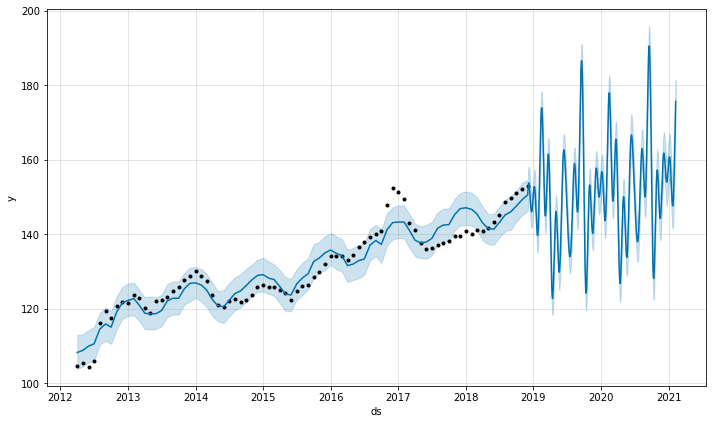

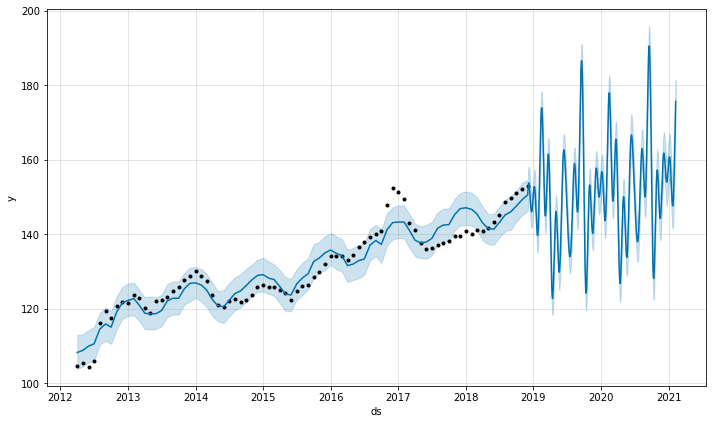

In [112]:
model.plot(prediction)


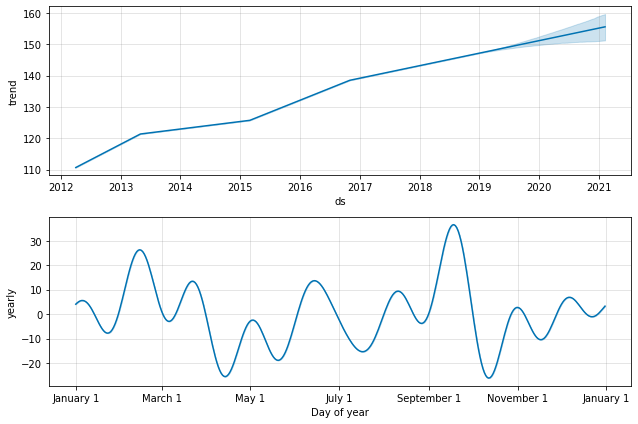

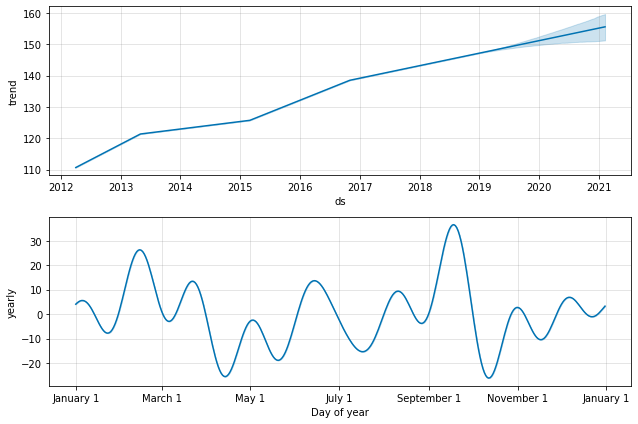

In [108]:
model.plot_components(prediction)

In [53]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 8 forecasts with cutoffs between 2014-06-20 00:00:00 and 2017-12-01 00:00:00
100%|██████████| 8/8 [00:37<00:00,  4.74s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-07-01,123.814978,121.881414,125.671884,122.2,2014-06-20
1,2014-08-01,120.158107,118.314905,121.946880,126.8,2014-06-20
2,2014-09-01,120.287406,118.318908,122.262292,126.5,2014-06-20
3,2014-10-01,123.433360,121.449258,125.568617,126.3,2014-06-20
4,2014-11-01,124.036269,121.845626,126.205763,127.7,2014-06-20


In [113]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
91,2018-08-01,132.969213,129.690318,136.508129,148.6,2017-12-01
92,2018-09-01,133.132887,129.575720,136.866955,149.8,2017-12-01
93,2018-10-01,133.934893,129.859001,138.156139,151.1,2017-12-01
94,2018-11-01,135.056280,130.061186,139.558872,152.2,2017-12-01
95,2018-12-01,135.923978,130.710165,140.737823,152.8,2017-12-01


In [73]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,42 days,18.725256,4.327269,2.945495,0.022423,0.005594,0.555556
1,46 days,15.026341,3.876382,2.627753,0.019689,0.005594,0.555556
2,47 days,15.196176,3.898227,2.731304,0.020511,0.010199,0.444444
3,51 days,15.193279,3.897856,2.730805,0.020327,0.010199,0.444444
4,53 days,15.190675,3.897522,2.722567,0.020262,0.010199,0.444444


C:\Users\deepa\anaconda3\envs\ML\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\deepa\anaconda3\envs\ML\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


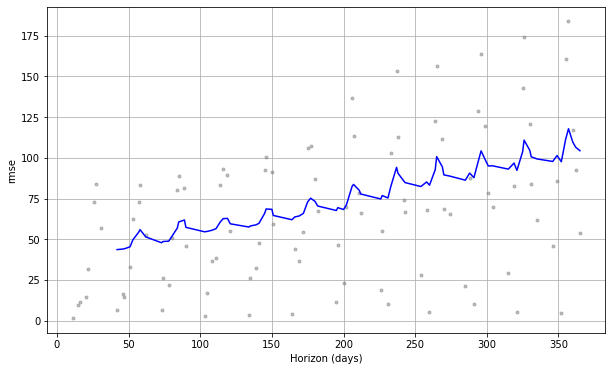

In [54]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [55]:
df2a=prediction.iloc[80:,0]
df2b=prediction.iloc[:,1]

In [56]:
df2=pd.concat([df2a,df2b],axis=1)

In [57]:
df2.tail()

,ds,trend
476,2020-01-01,71.482825
477,2020-01-02,71.400539
478,2020-01-03,71.318253
479,2020-01-04,71.235967
480,2020-01-05,71.153682


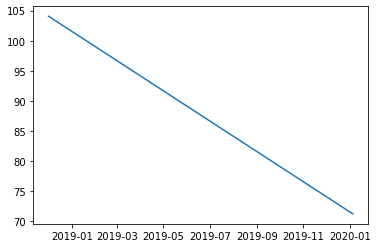

In [58]:
plt.plot(df2['ds'],df2['trend'])